In [17]:
import cv2
vidcap = cv2.VideoCapture('flexion.mp4')
success,image = vidcap.read()

while success:
  success,image = vidcap.read()

In [1]:
import cv2
import mediapipe as mp
import numpy as np
from math import pi, atan2, asin, degrees

# Mediapipe drawing
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
draw_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
# Mediapipe API --> holistic
mp_holistic = mp.solutions.holistic

# For webcam solution
holistic = mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# input
image = cv2.imread('pose_test.png')

# Flip image horizontally for selfie-view display & convert color space form BGR to RGB
image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
# To improve perormance
image.flags.writeable = False

# Get the result for mediapipe-holistic
results = holistic.process(image)

image.flags.writeable = True

# convert color space form RGB to BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

img_h, img_w, img_c = image.shape
rotation_3D = []
rotation_2D = []

# Extract landmarks and calculate face rotation angles
for idx, lm in enumerate(results.face_landmarks.landmark):
    if idx == 33 or idx == 263 or idx == 1 or idx == 61 or idx == 291 or idx == 199:
        if idx == 1:
            nose_2d = (lm.x * img_w, lm.y * img_h)
            nose_3d = (lm.x * img_w, lm.y * img_h, lm.z * 3000)

        x, y = int(lm.x * img_w), int(lm.y * img_h)

        # Get the 3D Coordinates
        rotation_3D.append([x, y, lm.z])
        # Get the 2D Coordinates
        rotation_2D.append([x, y])

# Convert it to the NumPy array 
rotation_3D = np.asarray(rotation_3D, dtype=np.float64)
rotation_2D = np.asarray(rotation_2D, dtype=np.float64)

# The camera matrix
focal_length = 1 * img_w

cam_matrix = np.asarray(
[[focal_length, 0, img_h / 2],
[0, focal_length, img_w / 2],
[0, 0, 1]], dtype=np.float64)

# The Distance Matrix
dist_matrix = np.zeros((4, 1), dtype=np.float64)

# Solve PnP
success, rot_vec, trans_vec = cv2.solvePnP(rotation_3D, rotation_2D, cam_matrix, dist_matrix)


# Get rotation matrix
rmat, jac = cv2.Rodrigues(rot_vec)


# Get angles
angles, mtxR, mtxQ, Qx, Qy, Qz = cv2.RQDecomp3x3(rmat)

# Get x, y, z angles
roll = 180*atan2(-rmat[2][1], rmat[2][2])/pi
pitch = 180*asin(rmat[2][0])/pi
yaw = 180*atan2(-rmat[1][0], rmat[0][0])/pi
rot_params = [roll, pitch, yaw]

nose_3d_projection, jacobian = cv2.projectPoints(nose_3d, rot_vec, trans_vec, cam_matrix, dist_matrix)

p1 = (int(nose_2d[0]), int(nose_2d[1]))
p2 = (int(nose_3d_projection[0][0][0]), int(nose_3d_projection[0][0][1]))

cv2.line(image, p1, p2, (255, 0, 0), 3)

cv2.putText(image, "x: " + str(np.round(x, 2)), (500, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
cv2.putText(image, "y: " + str(np.round(y, 2)), (500, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
# cv2.putText(image, "z: " + str(np.round(z, 2)), (500, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

mp_drawing.draw_landmarks(
    image = image,
    landmark_list = results.face_landmarks,
    connections = mp_holistic.FACEMESH_TESSELATION,
    landmark_drawing_spec = draw_spec,
    connection_drawing_spec = draw_spec)
mp_drawing.draw_landmarks(
    image,
    results.pose_landmarks,
    mp_holistic.POSE_CONNECTIONS,
    landmark_drawing_spec=mp_drawing_styles
    .get_default_pose_landmarks_style())

cv2.imwrite('Head Pose Estimation.jpg', image)


True

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd

# Mediapipe - Holistic
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

holistic = mp_holistic.Holistic(
  static_image_mode=True,
  min_detection_confidence=0.5,
  min_tracking_confidence=0.5)

# %%

# Read Video
inputVideo = cv2.VideoCapture('Flexion.mp4')
videoLength = int(inputVideo.get(cv2.CAP_PROP_FRAME_COUNT))
print(videoLength) # Video totally frames

success, image = inputVideo.read()
countFrames = 0

startPoint = []

# Video starting process
def getStartPoint(result):
    startPoint.append(result)

    return 0

while success:
  success, image = inputVideo.read()
  image = cv2.flip(image, -1)
  
  results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  if countFrames <= 50:
    startPosition = getStartPoint(results.pose_landmarks.landmark)
    

419


error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


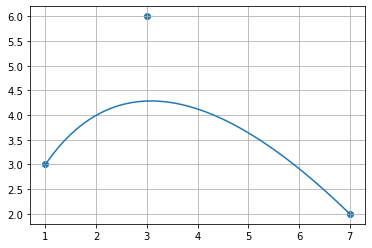

In [43]:
import numpy as np
import bezier
import matplotlib.pyplot as plt
from sympy import *

a = np.asfortranarray([[1,3,7], [3,6,2]])

curve = bezier.Curve(a, degree=2)

fig = plt.figure()
ax1 = fig.gca()
ax1.scatter(a[0],a[1])
ax1.grid()
bplt = curve.plot(num_pts=256, ax=ax1)

In [3]:
import numpy as np


headerLsit = ['sVar', 'sAngle', 'eAngle', 'length', 'speed', 'reSpeed', 'varSpeed']
header = 'ID,maxAngle,'
header += ','.join(s+str(i) for s in headerLsit for i in range(5))

print(header)

ID & side,maxAngle,sVar0,sVar1,sVar2,sVar3,sVar4,sAngle0,sAngle1,sAngle2,sAngle3,sAngle4,eAngle0,eAngle1,eAngle2,eAngle3,eAngle4,length0,length1,length2,length3,length4,speed0,speed1,speed2,speed3,speed4,reSpeed0,reSpeed1,reSpeed2,reSpeed3,reSpeed4,varSpeed0,varSpeed1,varSpeed2,varSpeed3,varSpeed4
